# WE RATE DOGS DATA ANALYZATION AND VISUALIZATION

In [1]:
# Import the Libraries to be used for the project
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import datetime
import os
import json
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
from nltk import pos_tag
from timeit import default_timer as timer

# Gather Data

1. The Enhanced Twitter Archive which is provided as a CSV file and loaded into the jupyter notebook.
2. The Image Predictions File which is provided via a URL in the classroom to be downloaded programmatically using the requests library
3. Download the Tweet JSON Data which is provided via a URL as I was unable to access the Twitter API on my own 

# 1. Enhanced Twitter Archive File

In [2]:
# Read the enhanced twitter archived data into a dataframe
twitter_archive_df = pd.read_csv(r"C:\Users\hp\twitter-archive-enhanced.csv")
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
twitter_archive_df.info

<bound method DataFrame.info of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689        

In [4]:
#Check one row to view its details
test_tweet = twitter_archive_df.iloc[14]
test_tweet

tweet_id                                                     889531135344209921
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-24 17:02:04 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Stuart. He's sporting his favorite fan...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/889531135...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

# 2. Image Predictions File

In [5]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [6]:
#Download tweet image predictions TSV using the Requests library as specified and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#create file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
#Import the tweet image predictions TSV file into a DataFrame and read the file
image_prediction_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
image_prediction_df.info

<bound method DataFrame.info of                 tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    66607119322150

In [8]:
#Check one row to see its details
image_prediction_df.iloc[4]


tweet_id                                 666049248165822465
jpg_url     https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
img_num                                                   1
p1                                       miniature_pinscher
p1_conf                                            0.560311
p1_dog                                                 True
p2                                               Rottweiler
p2_conf                                            0.243682
p2_dog                                                 True
p3                                                 Doberman
p3_conf                                            0.154629
p3_dog                                                 True
Name: 4, dtype: object

# 3. Download Tweet JSON Data by querying Twitter API using Python's Tweepy Library

In [9]:
consumer_key = "xxxx"
consumer_secret = "xxxx"
access_token = "xxxx"
access_token_secret = "xxxx"

#Create the Twitter API object and set rate limit
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [10]:
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        # To save space, only print out loop/tweet id for every 100th tweet
        if count % 100 == 0:
            print("loop # " + str(count))

end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 180


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Rate limit reached. Sleeping for: 32


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

In [11]:
tweet._json_file = 'tweet_json.txt'

In [13]:
# read in the JSON data from the text file, and save to a DataFrame
tweet_json_data = []

with open(tweet._json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
json_tweets_df = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])



In [14]:
json_tweets_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7048,33913
1,892177421306343426,5320,29397
2,891815181378084864,3502,22113
3,891689557279858688,7256,37028
4,891327558926688256,7799,35397
5,891087950875897856,2611,17853
6,890971913173991426,1677,10399
7,890729181411237888,15834,56995
8,890609185150312448,3638,24584
9,890240255349198849,6131,28041


In [15]:
json_tweets_df.info

<bound method DataFrame.info of                 tweet_id  retweet_count  favorite_count
0     892420643555336193           7048           33913
1     892177421306343426           5320           29397
2     891815181378084864           3502           22113
3     891689557279858688           7256           37028
4     891327558926688256           7799           35397
5     891087950875897856           2611           17853
6     890971913173991426           1677           10399
7     890729181411237888          15834           56995
8     890609185150312448           3638           24584
9     890240255349198849           6131           28041
10    890006608113172480           6176           27105
11    889880896479866881           4187           24633
12    889665388333682689           8389           42163
13    889638837579907072           3738           23739
14    889531135344209921           1886           13388
15    889278841981685760           4464           22174
16    8889172381

# ASSESSING THE DATA
Now it is time to access all the data that was gathered both visually and programmatically for quality and tidiness issues. The major focus of this analysis is that only original tweets, with valid ratings and images are required. Tweets without images and retweers will be dropped.

# Print twitter archive dataset to assess it to know what to clean

In [16]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [17]:
# Print some random expamles from columns values
# random number just to check if we can find something sucpisious
print(twitter_archive_df['text'][1984])
print(twitter_archive_df['name'][10])

This is Jimison. He's stuck in a pot. Damn it Jimison. 9/10 https://t.co/KpLyca3o3E
Koda


In [18]:
# Assessing the data programmaticaly
twitter_archive_df.info()
twitter_archive_df.describe()
twitter_archive_df['rating_numerator'].value_counts()
twitter_archive_df['rating_denominator'].value_counts()
twitter_archive_df['name'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
Buddy          7
Daisy          7
an             7
Toby           7
Leo            6
Koda           6
Milo           6
Bella          6
Scout          6
Jack           6
Oscar          6
Jax            6
Dave           6
Rusty          6
Stanley        6
Larry          5
            ... 
Shadoe         1
Jo             1
Bubba          1
Poppy          1
Goose          1
Batdog         1
Danny          1
Mutt           1
Suki           1
Carll          1
Teddy          1
Mojo           1
Godi           1
Akumi          1
Jeb            1
Marq           1
Sweet          1
Rudy           1
Brat           1
Rascal         1
Kaia           1
Sailor         1
Jeremy         1
Noosh          1
Finnegus       1
Peanut         1
Chase          1
Howie         

Notes:
From the info() method several quality and tidiness issues were observed as follow:

Quality:
1. There are 181 retweets in columns (retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp).
2. There are 78 replies in columns in_reply_to_status_id and in_reply_to_user_id.
3. There are 2297 tweets with expanded_urls indicating 59 tweets with missing images.
4. The timestamp field is in string format (object)

Tidiness:
1. There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
2. Dog names are meant to be capitalized, so other words that begins with lower cases and that does not look like names will not be considered as name.

# I want to review the columns that I will need in number from info to be sure it was extracted properly

I want to check for decimals in the column 'rating_numerator' and 'rating_denominator'

In [19]:
twitter_archive_df[twitter_archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator','rating_denominator']]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1689,I've been told there's a slight possibility he...,5,10
1712,Here we have uncovered an entire battalion of ...,26,10


I want to have a view of the 6 rows that have decimals that were extracted wrongly to get their correct values

In [20]:
twitter_archive_df.iloc[45]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-08 00:28:19 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                              5
rating_denominator                                                           10
name                                    

In [21]:
twitter_archive_df.iloc[340]

tweet_id                                                     832215909146226688
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-02-16 13:11:49 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          RT @dog_rates: This is Logan, the Chow who liv...
retweeted_status_id                                                 7.86709e+17
retweeted_status_user_id                                            4.19698e+09
retweeted_status_timestamp                            2016-10-13 23:23:56 +0000
expanded_urls                 https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                             75
rating_denominator                                                           10
name                                    

In [22]:
twitter_archive_df.iloc[695]

tweet_id                                                     786709082849828864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-10-13 23:23:56 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Logan, the Chow who lived. He solemnly...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                             75
rating_denominator                                                           10
name                                    

In [23]:
twitter_archive_df.iloc[763]

tweet_id                                                     778027034220126208
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-09-20 00:24:34 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Sophie. She's a Jubilant Bush Pupper. ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/778027034...
rating_numerator                                                             27
rating_denominator                                                           10
name                                    

In [24]:
twitter_archive_df.iloc[1689]

tweet_id                                                     681340665377193984
in_reply_to_status_id                                               6.81339e+17
in_reply_to_user_id                                                 4.19698e+09
timestamp                                             2015-12-28 05:07:27 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          I've been told there's a slight possibility he...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                              5
rating_denominator                                                           10
name                                    

In [25]:
twitter_archive_df.iloc[1712]

tweet_id                                                     680494726643068929
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-12-25 21:06:00 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here we have uncovered an entire battalion of ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/680494726...
rating_numerator                                                             26
rating_denominator                                                           10
name                                    

Note:

1. The correct values for row 45 is 13.5, row 340 is a retweet so I won't be needing it, row 695 is 9.75, row 763 is 11.27, 
row 1689 has no expanded url so I won't be needin it and row 1712 is 11.26.
2. The column 'Name' has some values that are not names that I will be setting to NaN in the next section

In [26]:
image_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [27]:
image_prediction_df.info()
image_prediction_df['jpg_url'].value_counts()
image_prediction_df[image_prediction_df['jpg_url'] == 'https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True


In [28]:
image_prediction_df.duplicated().sum()

0

In [29]:
json_tweets_df


,tweet_id,retweet_count,favorite_count
0,892420643555336193,7048,33913
1,892177421306343426,5320,29397
2,891815181378084864,3502,22113
3,891689557279858688,7256,37028
4,891327558926688256,7799,35397
5,891087950875897856,2611,17853
6,890971913173991426,1677,10399
7,890729181411237888,15834,56995
8,890609185150312448,3638,24584
9,890240255349198849,6131,28041


In [30]:
json_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
tweet_id          2325 non-null int64
retweet_count     2325 non-null int64
favorite_count    2325 non-null int64
dtypes: int64(3)
memory usage: 54.5 KB


Make a copy of the datasets before commencing cleaning

In [31]:
twitter_master_df = twitter_archive_df.copy
twitter_master_df

<bound method NDFrame.copy of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689          

In [32]:
image_master_df = image_prediction_df.copy
image_master_df

<bound method NDFrame.copy of                 tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    6660711932215091

In [33]:
json_master_df = json_tweets_df.copy
json_master_df

<bound method NDFrame.copy of                 tweet_id  retweet_count  favorite_count
0     892420643555336193           7048           33913
1     892177421306343426           5320           29397
2     891815181378084864           3502           22113
3     891689557279858688           7256           37028
4     891327558926688256           7799           35397
5     891087950875897856           2611           17853
6     890971913173991426           1677           10399
7     890729181411237888          15834           56995
8     890609185150312448           3638           24584
9     890240255349198849           6131           28041
10    890006608113172480           6176           27105
11    889880896479866881           4187           24633
12    889665388333682689           8389           42163
13    889638837579907072           3738           23739
14    889531135344209921           1886           13388
15    889278841981685760           4464           22174
16    888917238123

# Quality Issues

1. Twitter Archive Dataset:

    *There are 181 retweets duplicated in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

    *There are 78 reply tweets in_reply_to_status_id, and in_reply_to_user_id.

    *The column rating_numerator had some values wrongly extracted
    
    *There are 2297 tweets with expanded_urls.

    *Timestamp is in string format

    *Name column have invalid names i.e. None and a.

    *Several other columns have NaN and none values.

    *There are 745 tweets with the dog name as "None" and there are also other names that are just alphabets with no meaning.

 2.	Image Prediction Dataset:
 
    *The file downloaded contained some joined strings.

    *There are 2075 image predictions, 281 less than the number of tweets in the Twitter archive dataset.

    *Some tweet_ids have the same jpg_url.

3. Tweet Json Data:

    *Missing values found when reading Json Data., leaving me with 2327 tweets which is 29 less than the number of tweets in       the Twitter archive dataset

    *High max value of numerator and denominator rating, 1776 and 170 respectively


# Tidiness Issues

1. We are interested in only the original tweets for this project, so the columns retweeted_status_id , retweeted_status_user_id, and retweeted_status_timestamp could be done without.

2. Twitter Archive Data - doggo, fluffer, pupper and puppo column all pointing to dog stages were merged from separate columns. 

3. Also a new column was created for dog_gender.

4. Image Prediction - The columns p1, p2 and p3 contain the same type of data, predictions.

5. Tweet Json Data - rating denominator column was deleted when all denominator had the same value 10.

6. Some column names were repetitive 


# CLEANING OF DATA 

In [34]:
#We are merging our dataframes in one and save the result in file as backup
df_combined = pd.merge(twitter_archive_df, image_prediction_df, how = 'left', on = ['tweet_id'] )
df_combined = pd.merge(df_combined, json_tweets_df, how = 'left', on = ['tweet_id'])
df_combined.to_csv('df_combined.csv')
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

# Delete the rows and columns we are not analyzing

# define

Keep original ratings that have images (not retweets) and drop columns that are not needed

# code

In [35]:
#Delete retweets by filtering the NaN of retweeted_status_user_id
df_combined = df_combined[pd.isnull(df_combined['retweeted_status_user_id'])]
# Delete tweets with no pictures
df_combined = df_combined.dropna(subset = ['jpg_url'])
# Delete duplicated tweet_id
df_combined = df_combined.drop_duplicates()  

# test

In [36]:
len(df_combined) 

1994

# define

Drop columns not needed for our analysis

# code

In [37]:
df_combined = df_combined.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)  

# test

In [38]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-nu

# define

Use the melt function to combine columns doggo, floofer, pupper and puppo into one column dog_stage

# code

In [39]:
# Check the values in those columns by excuting those columns
print(df_combined.doggo.value_counts())
print(df_combined.floofer.value_counts())
print(df_combined.pupper.value_counts())
print(df_combined.puppo.value_counts())

None     1920
doggo      74
Name: doggo, dtype: int64
None       1986
floofer       8
Name: floofer, dtype: int64
None      1782
pupper     212
Name: pupper, dtype: int64
None     1971
puppo      23
Name: puppo, dtype: int64


In [40]:
columns_to_melt = ['doggo', 'floofer', 'pupper', 'puppo']
columns_to_stay = [x for x in df_combined.columns.tolist() if x not in columns_to_melt]

#Melt the the columns into values
df_combined = pd.melt(df_combined, id_vars = columns_to_stay, value_vars = columns_to_melt, 
                         var_name = 'stages', value_name = 'dog_stage')

#Delete column 'stages'
df_combined = df_combined.drop('stages', 1)

# Filter for unique values then remove duplicate values based on 'dog_stage' values

#Print the output
print(df_combined.dog_stage.value_counts())

df_combined = df_combined.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')




None       7659
pupper      212
doggo        74
puppo        23
floofer       8
Name: dog_stage, dtype: int64


# test

In [41]:
print(df_combined.dog_stage.value_counts())
print(len(df_combined))

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64
1994


# define

Now let us change our rate_numerator and rate_denominator data type into floats and update the wrong extraction done for 
the original tweets and the tweets with images (url)

In [42]:
#update values
df_combined.loc[(df_combined.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
df_combined.loc[(df_combined.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
df_combined.loc[(df_combined.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
df_combined.loc[(df_combined.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

# test

In [43]:
#confirm changes
df_combined[df_combined.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator,rating_denominator
39,This is Bella. She hopes her smile made you sm...,13.50,10
3368,Here we have uncovered an entire battalion of ...,11.26,10
2497,"This is Logan, the Chow who lived. He solemnly...",9.75,10
4541,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10


# define

Clean the incorrect dog names

# code

In [44]:
df_combined.name.unique()

array(['Biden', 'None', 'Cupcake', 'Reese', 'a', 'Philippe', 'Hall',
       'Dook', 'Naphaniel', 'Frank', 'Kial', 'George', 'Olive', 'Calvin',
       'Filup', 'Fwed', 'Joshwa', 'Jockson', 'Jeph', 'Carll', 'Klevin',
       'Keet', 'Dave', 'Clybe', 'Gabe', 'Pipsy', 'Bradlay', 'Churlie',
       'Kenneth', 'Clarence', 'Timison', 'Genevieve', 'Shaggy', 'Tedrick',
       'Stu', 'Erik', 'Cleopatricia', 'Otis', 'Jiminy', 'Alfie', 'Josep',
       'Ron', 'Lugan', 'Christoper', 'Skittles', 'an', 'quite', 'Walter',
       'Scout', 'Kreggory', 'Jimothy', 'the', 'Phineas', 'Cash', 'Nugget',
       'Goose', 'Venti', 'Benedict', 'Nelly', 'Dante', 'Penny', 'Aja',
       'Emmy', 'Shadow', 'Derek', 'Mingus', 'Maya', 'Canela', 'such',
       'Jeffrey', 'Gerald', 'Ralphus', 'Zeke', 'Jim', 'Oliver', 'Ted',
       'Bruno', 'Koda', 'Zoey', 'Jax', 'Franklin', 'Darla', 'Archie',
       'Tilly', 'Waffles', 'Jimbo', 'Maisey', 'Beau', 'Steven', 'Jack',
       'Duddles', 'Bailey', 'Romeo', 'Jesse', 'Bella', 'Louis'

In [45]:
df_combined['name'][df_combined['name'].str.match('[a-z]+')] = 'None'

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# test

In [46]:
#confirm changes
df_combined.name.value_counts()

None         644
Charlie       11
Cooper        10
Oliver        10
Lucy          10
Tucker         9
Penny          9
Winston        8
Sadie          8
Toby           7
Daisy          7
Lola           7
Koda           6
Bella          6
Bo             6
Stanley        6
Jax            6
Bailey         5
Louis          5
Dave           5
Oscar          5
Scout          5
Leo            5
Buddy          5
Milo           5
Rusty          5
Chester        5
Brody          4
Jack           4
Phil           4
            ... 
Mimosa         1
Jaspers        1
Pete           1
Shnuggles      1
Shadoe         1
Danny          1
Mutt           1
Brian          1
Suki           1
Carll          1
Blitz          1
Mojo           1
Godi           1
Akumi          1
Claude         1
Jeb            1
Marq           1
Ron            1
Brat           1
Enchilada      1
Kaia           1
Sailor         1
Nimbus         1
Jeremy         1
Henry          1
Finnegus       1
Peanut         1
Chase         

In [47]:
df_combined.name.unique()

array(['Biden', 'None', 'Cupcake', 'Reese', 'Philippe', 'Hall', 'Dook',
       'Naphaniel', 'Frank', 'Kial', 'George', 'Olive', 'Calvin', 'Filup',
       'Fwed', 'Joshwa', 'Jockson', 'Jeph', 'Carll', 'Klevin', 'Keet',
       'Dave', 'Clybe', 'Gabe', 'Pipsy', 'Bradlay', 'Churlie', 'Kenneth',
       'Clarence', 'Timison', 'Genevieve', 'Shaggy', 'Tedrick', 'Stu',
       'Erik', 'Cleopatricia', 'Otis', 'Jiminy', 'Alfie', 'Josep', 'Ron',
       'Lugan', 'Christoper', 'Skittles', 'Walter', 'Scout', 'Kreggory',
       'Jimothy', 'Phineas', 'Cash', 'Nugget', 'Goose', 'Venti',
       'Benedict', 'Nelly', 'Dante', 'Penny', 'Aja', 'Emmy', 'Shadow',
       'Derek', 'Mingus', 'Maya', 'Canela', 'Jeffrey', 'Gerald',
       'Ralphus', 'Zeke', 'Jim', 'Oliver', 'Ted', 'Bruno', 'Koda', 'Zoey',
       'Jax', 'Franklin', 'Darla', 'Archie', 'Tilly', 'Waffles', 'Jimbo',
       'Maisey', 'Beau', 'Steven', 'Jack', 'Duddles', 'Bailey', 'Romeo',
       'Jesse', 'Bella', 'Louis', 'Elliot', 'Gary', 'Koko', 'Alfy',

# define

We need to clean the prediction column

# code

In [48]:
prediction_algorithm = []
confidence_level = []

#Get_prediction_confidence function:
#append the first true algorithm to a list with it's level of confidence
#it will have a value NAN if flase prediction_algorthm 
def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction_algorithm.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction_algorithm.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction_algorithm.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        prediction_algorithm.append('NaN')
        confidence_level.append(0)

df_combined.apply(get_prediction_confidence, axis=1)
df_combined['prediction_algorithm'] = prediction_algorithm
df_combined['confidence_level'] = confidence_level




# test

In [49]:
list(df_combined)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

# define

#Delete the columns with image prediction missing information

# code

In [50]:
df_combined = df_combined.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)



# test

In [51]:
list(df_combined)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'retweet_count',
 'favorite_count',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

# define

I want to check the counts in each columns

# code

In [52]:
#check the value of each column
df_combined.apply(lambda x: len(x.unique()))

tweet_id                1994
timestamp               1994
source                     3
text                    1994
rating_numerator          35
rating_denominator        15
name                     914
jpg_url                 1994
retweet_count           1530
favorite_count          1832
dog_stage                  5
prediction_algorithm     114
confidence_level        1684
dtype: int64

In [53]:
#I want to visualize the source of tweets
df_combined.info()
df_combined['source'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 13 columns):
tweet_id                1994 non-null int64
timestamp               1994 non-null object
source                  1994 non-null object
text                    1994 non-null object
rating_numerator        1994 non-null float64
rating_denominator      1994 non-null int64
name                    1994 non-null object
jpg_url                 1994 non-null object
retweet_count           1984 non-null float64
favorite_count          1984 non-null float64
dog_stage               1994 non-null object
prediction_algorithm    1994 non-null object
confidence_level        1994 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 163.6+ KB


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [54]:
#To remove string charaxters from source
df_combined['source'] = df_combined['source'].str.extract('^<a.+>(.+)</a>$')

In [55]:
df_combined = df_combined.replace(r'^\s*$', np.nan,regex=True)

# describe

Clean the rating columns (numerator and denominator)

In [56]:
df_combined[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,1994.000000,1994.000000
mean,12.237101,10.532096
std,41.471197,7.320710
min,0.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [57]:
df_combined.rating_numerator.value_counts().sort_index(ascending = False)

1776.00      1
420.00       1
204.00       1
165.00       1
144.00       1
143.00       1
121.00       1
99.00        1
88.00        1
84.00        1
80.00        1
60.00        1
50.00        1
45.00        1
44.00        1
24.00        1
14.00       35
13.50        1
13.00      261
12.00      450
11.27        1
11.26        1
11.00      396
10.00      419
9.75         1
9.00       151
8.00        95
7.00        52
6.00        32
5.00        32
4.00        16
3.00        19
2.00         9
1.00         5
0.00         2
Name: rating_numerator, dtype: int64

In [58]:
df_combined.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        1
11        2
10     1976
7         1
2         1
Name: rating_denominator, dtype: int64

The max numerator value is 1776 while that of denominator is 170(THESE VALUES ARE HIGH)

In [59]:
# display tweets that do NOT have denominator of 10,
mask_find = (df_combined.rating_denominator != 10) 
            

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
df_combined[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
1973,This is an Albanian 3 1/2 legged Episcopalian...,666287406224695296,1.0,2
3322,This is Darrel. He just robbed a 7/11 and is i...,682962037429899265,7.0,11
3297,Someone help the girl is being mugged. Several...,684222868335505415,121.0,110
3296,"Two sneaky puppers were not initially seen, mo...",684225744407494656,143.0,130
2982,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45.0,50
2964,Here's a brigade of puppers. All look very pre...,710658690886586372,80.0,80
2919,This is Bluebert. He just saw that both #Final...,716439118184652801,50.0,50
2940,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99.0,90
3124,Happy Wednesday here's a bucket of pups. 44/40...,697463031882764288,44.0,40
3048,Here is a whole flock of puppers. 60/50 I'll ...,704054845121142784,60.0,50


In [60]:
sum(mask_find)

18

In [61]:
sum(df_combined.rating_numerator >= 15)

16

In [62]:
df_tweets_denom_10 = df_combined[df_combined.rating_denominator == 10]


In [63]:
sum(df_tweets_denom_10.rating_numerator >= 15)

2

Note:

Looking ONLY at tweets that have denominators = 10, there are 2 with numerators >= 15 

In [64]:
# display tweets with numerator >= 15
mask_find = (df_combined.rating_denominator == 10) & \
            (df_combined.rating_numerator >= 15) 


mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
df_combined[mask_find][mask_cols]


,text,tweet_id,rating_numerator,rating_denominator
3712,After so many requests... here you go.\n\nGood...,670842764863651840,420.0,10
2720,This is Atticus. He's quite simply America af....,749981277374128128,1776.0,10


In [65]:
# Print the values and check if there exist in the text
print(df_combined[df_combined.rating_numerator == 1776]['text'][2720])
print(df_combined[df_combined.rating_denominator == 170]['text'][2842])
print(df_combined[df_combined.tweet_id == 820690176645140481		]['text'][2317])
print(df_combined['text'][1973])
print(df_combined['text'][2379])

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [66]:
# display tweets with numerator = 0 
mask_find = (df_combined.rating_denominator == 10) & \
            (df_combined.rating_numerator == 0) 
            
mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
df_combined[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
2229,When you're so blinded by your systematic plag...,835152434251116546,0.0,10
2750,"PUPDATE: can't see any. Even if I could, I cou...",746906459439529985,0.0,10


There are two tweets with numerator (rating) of '0'

In [67]:
#Drop the two rows with 0 value for rate_numerator
df_combined = df_combined[df_combined['rating_numerator'] != 0]

# test

In [68]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1918 to 6764
Data columns (total 13 columns):
tweet_id                1992 non-null int64
timestamp               1992 non-null object
source                  1992 non-null object
text                    1992 non-null object
rating_numerator        1992 non-null float64
rating_denominator      1992 non-null int64
name                    1992 non-null object
jpg_url                 1992 non-null object
retweet_count           1982 non-null float64
favorite_count          1982 non-null float64
dog_stage               1992 non-null object
prediction_algorithm    1992 non-null object
confidence_level        1992 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 163.4+ KB


In [69]:
df_combined.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,retweet_count,favorite_count,dog_stage,prediction_algorithm,confidence_level
1918,667405339315146752,2015-11-19 18:13:27 +0000,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,7.0,10,Biden,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,197.0,413.0,None,Saint_Bernard,0.381377
1917,667435689202614272,2015-11-19 20:14:03 +0000,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,77.0,269.0,None,Rottweiler,0.999091
1916,667437278097252352,2015-11-19 20:20:22 +0000,Twitter for iPhone,Never seen this breed before. Very pointy pup....,10.0,10,None,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,202.0,398.0,None,NaN,0.000000
1915,667443425659232256,2015-11-19 20:44:47 +0000,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,492.0,684.0,None,NaN,0.000000
1914,667453023279554560,2015-11-19 21:22:56 +0000,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,11.0,10,Cupcake,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,74.0,280.0,None,Labrador_retriever,0.825670


In [70]:
df_combined['source'].value_counts()


Twitter for iPhone    1953
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

There are only 3 types of sources that are original tweets with images and valid ratings as indicated below

    * Twitter for iPhone
    * Twitter Web Client
    * TweetDeck



# define

Analyze the dogs' gender

# code

In [71]:
#Loop on all the texts and check if it has one of pronouns of male or female
#to append the result in a list

male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in df_combined['text']:
    # Male
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    # Female
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    # If group or not specified
    else:
        dog_gender.append('NaN')

#list
len(dog_gender)


df_combined['dog_gender'] = dog_gender


print("dog_gender count \n", df_combined.dog_gender.value_counts())

dog_gender count 
 NaN       1130
male       636
female     226
Name: dog_gender, dtype: int64


In [72]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1918 to 6764
Data columns (total 14 columns):
tweet_id                1992 non-null int64
timestamp               1992 non-null object
source                  1992 non-null object
text                    1992 non-null object
rating_numerator        1992 non-null float64
rating_denominator      1992 non-null int64
name                    1992 non-null object
jpg_url                 1992 non-null object
retweet_count           1982 non-null float64
favorite_count          1982 non-null float64
dog_stage               1992 non-null object
prediction_algorithm    1992 non-null object
confidence_level        1992 non-null float64
dog_gender              1992 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 171.2+ KB


In [73]:
df_combined.loc[df_combined['prediction_algorithm'] == 'NaN', 'prediction_algorithm'] = None
df_combined.loc[df_combined['name'] == 'NaN', 'name'] = None
df_combined.loc[df_combined['dog_gender'] == 'NaN', 'dog_gender'] = None
df_combined.loc[df_combined['rating_numerator'] == 'NaN', 'rating_numerator'] = 0
df_combined.loc[df_combined['rating_denominator'] == 'NaN', 'rating_denominator'] = 0


C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [74]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1918 to 6764
Data columns (total 14 columns):
tweet_id                1992 non-null int64
timestamp               1992 non-null object
source                  1992 non-null object
text                    1992 non-null object
rating_numerator        1992 non-null float64
rating_denominator      1992 non-null int64
name                    1992 non-null object
jpg_url                 1992 non-null object
retweet_count           1982 non-null float64
favorite_count          1982 non-null float64
dog_stage               1992 non-null object
prediction_algorithm    1685 non-null object
confidence_level        1992 non-null float64
dog_gender              862 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 171.2+ KB


# define

Convert each column to the appropriate type

# code

In [75]:
df_combined.dtypes

tweet_id                  int64
timestamp                object
source                   object
text                     object
rating_numerator        float64
rating_denominator        int64
name                     object
jpg_url                  object
retweet_count           float64
favorite_count          float64
dog_stage                object
prediction_algorithm     object
confidence_level        float64
dog_gender               object
dtype: object

In [76]:
df_combined['tweet_id'] = df_combined['tweet_id'].astype(object)
df_combined['timestamp'] = pd.to_datetime(df_combined.timestamp)
df_combined['source'] = df_combined['source'].astype('category')
df_combined['rating_denominator'] = df_combined['rating_denominator'].astype(float)
df_combined['dog_stage'] = df_combined['dog_stage'].astype('category')
df_combined['dog_gender'] = df_combined['dog_gender'].astype('category')

# test

In [77]:
df_combined.dtypes

tweet_id                             object
timestamp               datetime64[ns, UTC]
source                             category
text                                 object
rating_numerator                    float64
rating_denominator                  float64
name                                 object
jpg_url                              object
retweet_count                       float64
favorite_count                      float64
dog_stage                          category
prediction_algorithm                 object
confidence_level                    float64
dog_gender                         category
dtype: object

# TIDINESS

# define

Rename columns to be cleaner

# code

In [78]:
df_combined = df_combined.rename(columns = {'timestamp': 'tweet_date', 'source': 'tweet_source', 'text': 'tweet_text', 
                                        'expanded_urls': 'tweet_url', 'jpg_url': 'tweet_picture', 
                                        'favorite_count': 'tweet_favorite', 'retweet_count': 'tweet_retweet',
                                        'prediction_algorithm' : 'dog_breed'})

# test

In [79]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1918 to 6764
Data columns (total 14 columns):
tweet_id              1992 non-null object
tweet_date            1992 non-null datetime64[ns, UTC]
tweet_source          1992 non-null category
tweet_text            1992 non-null object
rating_numerator      1992 non-null float64
rating_denominator    1992 non-null float64
name                  1992 non-null object
tweet_picture         1992 non-null object
tweet_retweet         1982 non-null float64
tweet_favorite        1982 non-null float64
dog_stage             1992 non-null category
dog_breed             1685 non-null object
confidence_level      1992 non-null float64
dog_gender            862 non-null category
dtypes: category(3), datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 153.9+ KB


# define

Remove column 'rating_denominator'

# code

In [80]:
# Since rating_denominator has one value 10, delete the column
print(df_combined.rating_denominator.value_counts())
df_combined.drop('rating_denominator', 1, inplace = True)

10.0     1974
50.0        3
80.0        2
11.0        2
170.0       1
150.0       1
130.0       1
20.0        1
70.0        1
7.0         1
120.0       1
40.0        1
90.0        1
110.0       1
2.0         1
Name: rating_denominator, dtype: int64


# test

In [81]:
list(df_combined)

['tweet_id',
 'tweet_date',
 'tweet_source',
 'tweet_text',
 'rating_numerator',
 'name',
 'tweet_picture',
 'tweet_retweet',
 'tweet_favorite',
 'dog_stage',
 'dog_breed',
 'confidence_level',
 'dog_gender']

In [82]:
df_combined.head()

,tweet_id,tweet_date,tweet_source,tweet_text,rating_numerator,name,tweet_picture,tweet_retweet,tweet_favorite,dog_stage,dog_breed,confidence_level,dog_gender
1918,667405339315146752,2015-11-19 18:13:27+00:00,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,7.0,Biden,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,197.0,413.0,None,Saint_Bernard,0.381377,NaN
1917,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,77.0,269.0,None,Rottweiler,0.999091,NaN
1916,667437278097252352,2015-11-19 20:20:22+00:00,Twitter for iPhone,Never seen this breed before. Very pointy pup....,10.0,None,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,202.0,398.0,None,None,0.000000,NaN
1915,667443425659232256,2015-11-19 20:44:47+00:00,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,492.0,684.0,None,None,0.000000,NaN
1914,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,11.0,Cupcake,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,74.0,280.0,None,Labrador_retriever,0.825670,NaN


# Storing, Analyzing, and Visualizing Data

In [83]:
# Store the clean DataFrame in a CSV file
df_combined.to_csv('twitter_archive_master.csv', index=False)

In [84]:
df_combined = pd.read_csv('twitter_archive_master.csv')
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 13 columns):
tweet_id            1992 non-null int64
tweet_date          1992 non-null object
tweet_source        1992 non-null object
tweet_text          1992 non-null object
rating_numerator    1992 non-null float64
name                1992 non-null object
tweet_picture       1992 non-null object
tweet_retweet       1982 non-null float64
tweet_favorite      1982 non-null float64
dog_stage           1992 non-null object
dog_breed           1685 non-null object
confidence_level    1992 non-null float64
dog_gender          862 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 140.1+ KB


# Visualization of Data

I will be creating tables and using statistical analyzation to answer some questions

1.What is the most used Twitter Source?

In [85]:
#Plot a bar chart to show the most used Twitter source
Source = ['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck']
tweet_id = [1953,28,11]

In [86]:
yman = np.arange(len(Source))
yman

array([0, 1, 2])

No handles with labels found to put in legend.


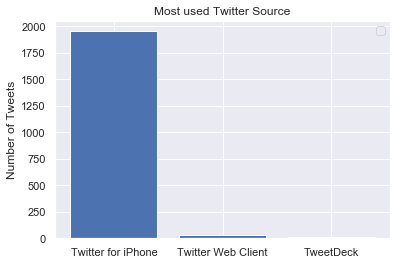

In [87]:
plt.xticks(yman, Source)
plt.ylabel('Number of Tweets')
plt.title('Most used Twitter Source')
plt.bar(yman,tweet_id )
plt.legend()

The users make use of Twitter for iPhone the most, followed by Twitter Web Client
and then TweetDeck.

2. What is the most popular dog gender by percentages?

Plot a pie chart to show the most popular dog_gender by their percentages


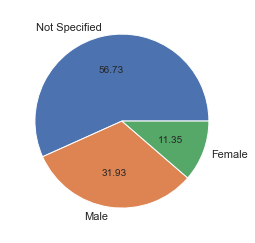

In [88]:
y = np.array([1130, 636, 226])
mylabels = ["Not Specified", "Male", "Female"]

plt.pie(y, labels = mylabels,autopct='%.2f')
plt.show() 

The percentages of gender is as follows
Unspecified Gender = 56.73%
Male = 31.93%
Female = 11.35%

In [89]:
#Make a copy of the combined dataframe table for correlation analysis
we_rate_dogs = df_combined.copy()
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 13 columns):
tweet_id            1992 non-null int64
tweet_date          1992 non-null object
tweet_source        1992 non-null object
tweet_text          1992 non-null object
rating_numerator    1992 non-null float64
name                1992 non-null object
tweet_picture       1992 non-null object
tweet_retweet       1982 non-null float64
tweet_favorite      1982 non-null float64
dog_stage           1992 non-null object
dog_breed           1685 non-null object
confidence_level    1992 non-null float64
dog_gender          862 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 140.1+ KB


In [90]:
we_rate_dogs[['rating_numerator','tweet_retweet','tweet_favorite','confidence_level']]

,rating_numerator,tweet_retweet,tweet_favorite,confidence_level
0,7.0,197.0,413.0,0.381377
1,12.0,77.0,269.0,0.999091
2,10.0,202.0,398.0,0.000000
3,6.0,492.0,684.0,0.000000
4,11.0,74.0,280.0,0.825670
5,7.0,53.0,170.0,0.676376
6,11.0,85.0,225.0,0.304175
7,7.0,192.0,459.0,0.852088
8,9.0,232.0,460.0,0.143957
9,11.0,195.0,486.0,0.996709


3. Show the correlation between favorite tweets and retweeted tweets

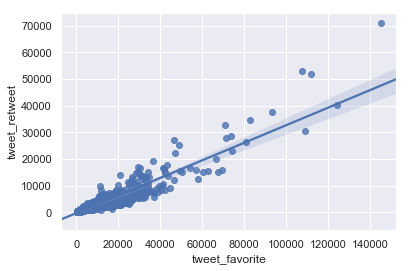

In [91]:
sns.regplot(x=we_rate_dogs["tweet_favorite"], y=we_rate_dogs["tweet_retweet"])


In [92]:
correlation = we_rate_dogs["tweet_favorite"].corr(we_rate_dogs["tweet_retweet"])

correlation 

0.9287064979000093

There is a strong positive correlation of 0.9287 between favorite tweet count and retweeted tweet count.
This is very true because there is a great possibility for what is liked to be retweeted.

4. Show the correlation between rating and retweeted tweets

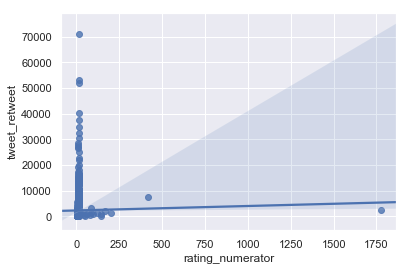

In [93]:
sns.regplot(x=we_rate_dogs["rating_numerator"], y=we_rate_dogs["tweet_retweet"])

In [94]:
correlation = we_rate_dogs["rating_numerator"].corr(we_rate_dogs["tweet_retweet"])

correlation 

0.017871318883813304

There is a positive correlation of 0.0177 between rating and retweeted tweet count.
This means that there is a little possible of a tweet with high rating to be retweeted


5. What is the top 5 most favorite tweet and the tweet source?

In [95]:
we_rate_dogs.sort_values(by = 'tweet_favorite', ascending = False).head()

,tweet_id,tweet_date,tweet_source,tweet_text,rating_numerator,name,tweet_picture,tweet_retweet,tweet_favorite,dog_stage,dog_breed,confidence_level,dog_gender
1716,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13.0,None,https://pbs.twimg.com/ext_tw_video_thumb/74423...,71092.0,145296.0,doggo,Labrador_retriever,0.825333,NaN
1973,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,13.0,None,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,40169.0,124457.0,puppo,Lakeland_terrier,0.196015,NaN
1037,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,13.0,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...,51951.0,112083.0,None,Chihuahua,0.505370,male
1865,866450705531457537,2017-05-22 00:28:40+00:00,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,13.0,Jamesy,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,30375.0,109173.0,pupper,French_bulldog,0.905334,male
1726,739238157791694849,2016-06-04 23:31:25+00:00,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,13.0,None,https://pbs.twimg.com/ext_tw_video_thumb/73923...,53153.0,107522.0,doggo,Eskimo_dog,0.503372,NaN


The tweet source for the top 5 favorite tweets is Twitter for iPhone

In [ ]:
6. What is the top 5 most highest rating tweet and the tweet source?

In [96]:
we_rate_dogs.sort_values(by = 'rating_numerator', ascending = False).head()

,tweet_id,tweet_date,tweet_source,tweet_text,rating_numerator,name,tweet_picture,tweet_retweet,tweet_favorite,dog_stage,dog_breed,confidence_level,dog_gender
1507,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,1776.0,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,2287.0,4797.0,None,NaN,0.000000,NaN
590,670842764863651840,2015-11-29 05:52:33+00:00,Twitter for iPhone,After so many requests... here you go.\n\nGood...,420.0,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,7622.0,22155.0,None,NaN,0.000000,NaN
1635,731156023742988288,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,204.0,None,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1147.0,3561.0,None,NaN,0.000000,NaN
1427,758467244762497024,2016-07-28 01:00:57+00:00,Twitter for iPhone,Why does this never happen at my front door......,165.0,None,https://pbs.twimg.com/ext_tw_video_thumb/75846...,2039.0,4493.0,None,Labrador_retriever,0.436377,NaN
909,677716515794329600,2015-12-18 05:06:23+00:00,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144.0,None,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,883.0,2796.0,None,chow,0.025438,NaN


Note:
    
The values for the two top 5 visual assessments favorite tweets and highest rating tweets has explained the result gotten
0.0179 from the programmatic analysis using correlation between the two values tweet_favorite and rating_numerator.